In [1]:

from multiprocessing import Pool
import pandas as pd
import sys
import os


In [4]:
from sonos_accelerator.accelerator import cli

In [5]:
from sonos_accelerator.get_layer_energies import get_layer_energies

In [6]:
#tx = cli()
#archParams, layerParams, tiles

In [7]:
def generate_energy_table(archParams,model_name):
    formed_data = {'active_cols':[],'allow_negatives':[], 'active_rows':[], 'energy':[]}
    for k,v in archParams['tileMVM_energies'].items():
        ncols = int(k)
        allow_negatives = 0 if ncols < 0 else 1
        ncols = abs(ncols)
        for active_rows in range(v.shape[0]):
            energy = v[active_rows]
            formed_data['active_cols'].append(ncols)
            formed_data['allow_negatives'].append(allow_negatives)
            formed_data['active_rows'].append(active_rows)
            formed_data['energy'].append(energy)
    formed_data = pd.DataFrame(formed_data)
    formed_data['model_name'] = model_name
    return formed_data

def generate_layer_stats(layer_params,layer_sizes, model_name):
    data = pd.DataFrame(layer_params)
    data['model_name'] = model_name
    data['tile_area'] = layer_sizes
    return data
            
def run_model(model_name="VGG16"):
    layer_params,arch_params,area_layers,energies,speed,base_energy_layer_df = cli(model_name)
    energy_table = generate_energy_table(arch_params,model_name)
    layer_table = generate_layer_stats(layer_params, area_layers, model_name)
    return [energy_table, layer_table,base_energy_layer_df,energies]

def combine_results(energy_table_list, layer_table_list,energy_layer_table_list):
    energy_table = pd.concat(energy_table_list)
    layer_table = pd.concat(layer_table_list)
    energy_layer_table = pd.concat(energy_layer_table_list)
    return energy_table, layer_table, energy_layer_table


In [8]:
def compute_model_energies():
    #models = ["ResNet34","ResNet50","ResNet50v15","VGG16"]
    models = ["ResNet50v15","VGG16"]
    models = ['VGG16']
    #energy_layer_tables = run_model("ResNet34")
    with Pool(10) as pool:
        energy_layer_tables = pool.map(run_model, models, 1)
        energy_table_list = [l[0] for l in energy_layer_tables]
        layer_table_list = [l[1] for l in energy_layer_tables]
        energy_dataframe_list = [l[2] for l in energy_layer_tables]
        
        
    return combine_results(energy_table_list, layer_table_list,energy_dataframe_list),energy_layer_tables

In [9]:
#layerParams, archParams, area_layers,energies,speed[1]

#layerParams, archParams, area_layers,energies,speed = compute_model_energies()
data1 =  cli(loadFromSaved=False)

Layer name:	array:	tile:	all:	Nbc:


E:\dev\athena\athena_tool\src\athena\athena_ir\sonos_accelerator\helpers\mathematical.py:9: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "findBlock" failed type inference due to: Can't unify return type from the following types: Literal[bool](False), UniTuple(int64 x 2)
Return of: IR name '$62return_value.6', type 'UniTuple(int64 x 2)', location: 
File "sonos_accelerator\helpers\mathematical.py", line 16:
def findBlock(N):
    <source elided>
		F1 -= 1
	return F1, intDiv(N,F1)
 ^
Return of: IR name '$12return_value.1', type 'Literal[bool](False)', location: 
File "sonos_accelerator\helpers\mathematical.py", line 12:
def findBlock(N):
    <source elided>
	if N < 1:
		return False
  ^
  @jit
E:\dev\athena\athena_tool\src\athena\athena_ir\sonos_accelerator\helpers\mathematical.py:9: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "findBlock" failed type inference due to: Cannot de

Conv1:		4, 4	28, 16	1
Conv2:	2, 2	4, 4	28, 16	1
Conv3:		2, 4	14, 8	1
Conv4:		2, 2	14, 8	1
Conv5:		2, 2	14, 2	1
Conv6:		1, 2	7, 4	1
Conv7:		1, 2	7, 4	1
Conv8:		1, 1	7, 1	1
Conv9:		1, 1	7, 1	2
Conv10:		1, 1	7, 1	2
Conv11:		1, 1	2, 1	2
Conv12:		1, 1	2, 1	2
Conv13:		1, 1	2, 1	2
----
Effective tile area in cmesh: 2.316 mm^2
Tile area: 1.844 mm^2
  Cores + ramp: 0.731 mm^2 (39.645%)
  Core: 0.727 mm^2 (39.406%)
     per core: 0.182mm^2
  RAM: 0.181 mm^2 (9.813%)
  Buffers: 0.671 mm^2 (36.372%)
     Receive FIFOs: 0.213 mm^2
     MVMin buffer: 0.143 mm^2
     ALUin buffer: 0.158 mm^2
     TileOut buffer: 0.157 mm^2
  Ramp generator: 0.004 mm^2 (0.238%)
  ALU: 0.169 mm^2 (9.171%)
     Adder1: 0.0020 mm^2
     Adder2: 0.0012 mm^2
     Bias Adder: 0.0232 mm^2
     ReLU: 0.0115 mm^2
     Range converter: 0.0791 mm^2
     MaxPool: 0.0033 mm^2
     AvgPool: 0.0064 mm^2
  Control unit: 0.0922 mm^2 (5.000%)
Total area: 769.030 mm^2
  0: Conv1 (28 tiles), MVM: 54 x 64, area: 64.858 mm^2 (8.434%), util

E:\dev\athena\athena_tool\src\athena\athena_ir\sonos_accelerator\buildAccelerator.py:1104: RuntimeWarning: invalid value encountered in double_scalars
  print("   Conv1 tiles: {:.3f}".format(100*util_devices_breakdown[0]/devices_breakdown[0])+'%')


Cycle 0, started 1 layers, finished 0 layers
Cycle 1, started 1 layers, finished 0 layers
Cycle 2, started 1 layers, finished 0 layers
Cycle 3, started 1 layers, finished 0 layers
Cycle 4, started 3 layers, finished 0 layers
Cycle 5, started 3 layers, finished 0 layers
Cycle 6, started 3 layers, finished 0 layers
Cycle 7, started 3 layers, finished 0 layers
Cycle 8, started 3 layers, finished 0 layers
Cycle 9, started 4 layers, finished 0 layers
Cycle 10, started 4 layers, finished 0 layers
Cycle 11, started 4 layers, finished 0 layers
Cycle 12, started 4 layers, finished 0 layers
Cycle 13, started 4 layers, finished 0 layers
Cycle 14, started 6 layers, finished 0 layers
Cycle 15, started 6 layers, finished 0 layers
Cycle 16, started 6 layers, finished 0 layers
Cycle 17, started 6 layers, finished 0 layers
Cycle 18, started 6 layers, finished 0 layers
Cycle 19, started 7 layers, finished 0 layers
Cycle 20, started 7 layers, finished 0 layers
Cycle 21, started 7 layers, finished 0 layer

E:\mplagge\Miniconda3\envs\athena_latest\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\mplagge\Miniconda3\envs\athena_latest\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
E:\mplagge\Miniconda3\envs\athena_latest\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


----
  Conv1 energy: 42.196 uJ, 5.057%, 4.262 TOPS/W
  Conv2 energy: 139.080 uJ, 16.669%, 26.645 TOPS/W
  MP1 energy: 0.000 uJ, 0.000%
  Conv3 energy: 75.665 uJ, 9.069%, 24.488 TOPS/W
  Conv4 energy: 139.675 uJ, 16.740%, 26.509 TOPS/W
  MP2 energy: 0.000 uJ, 0.000%
  Conv5 energy: 37.432 uJ, 4.486%, 49.457 TOPS/W
  Conv6 energy: 74.254 uJ, 8.899%, 49.842 TOPS/W
  Conv7 energy: 74.254 uJ, 8.899%, 49.842 TOPS/W
  MP3 energy: 6.712 uJ, 0.804%
  Conv8 energy: 23.945 uJ, 2.870%, 77.281 TOPS/W
  Conv9 energy: 71.785 uJ, 8.603%, 51.546 TOPS/W
  Conv10 energy: 71.927 uJ, 8.621%, 51.443 TOPS/W
  MP4 energy: 3.356 uJ, 0.402%
  Conv11 energy: 13.758 uJ, 1.649%, 67.235 TOPS/W
  Conv12 energy: 13.612 uJ, 1.631%, 67.957 TOPS/W
  Conv13 energy: 13.612 uJ, 1.631%, 67.957 TOPS/W
  MP5 energy: 2.728 uJ, 0.327%
  FC1 energy: 22.298 uJ, 2.672%, 9.217 TOPS/W
  Add1 energy: 1.689 uJ, 0.202%
  FC2 energy: 4.035 uJ, 0.484%, 8.317 TOPS/W
  Add2 energy: 1.072 uJ, 0.128%
  FC3 energy: 1.008 uJ, 0.121%, 8.128 TOP

E:\mplagge\Miniconda3\envs\athena_latest\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Maximum incoming message size: 4.000 kB
Maximum outcoming message size: 6.000 kB
Maximum incoming message size appears in Add2, (layer 21)
   Appears in 1 cycles
Maximum outgoing message size appears in Conv5, (layer 6)
   Appears in 105 cycles


In [10]:
data1

NameError: name 'data1' is not defined

In [13]:
data = compute_model_energies()

Layer name:	array:	tile:	all:	Nbc:


/mnt/e/dev/athena/athena_tool/src/athena/athena_ir/sonos_accelerator/helpers/mathematical.py:9: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "findBlock" failed type inference due to: Can't unify return type from the following types: Literal[bool](False), UniTuple(int64 x 2)
Return of: IR name '$62return_value.6', type 'UniTuple(int64 x 2)', location: 
File "sonos_accelerator/helpers/mathematical.py", line 16:
def findBlock(N):
    <source elided>
		F1 -= 1
	return F1, intDiv(N,F1)
 ^
Return of: IR name '$12return_value.1', type 'Literal[bool](False)', location: 
File "sonos_accelerator/helpers/mathematical.py", line 12:
def findBlock(N):
    <source elided>
	if N < 1:
		return False
  ^
  @jit
/mnt/e/dev/athena/athena_tool/src/athena/athena_ir/sonos_accelerator/helpers/mathematical.py:9: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "findBlock" failed type inference due to: C

Conv1:		4, 4	28, 16	1
Conv2:	2, 2	4, 4	28, 16	1
Conv3:		2, 4	14, 8	1
Conv4:		2, 2	14, 8	1
Conv5:		2, 2	14, 2	1
Conv6:		1, 2	7, 4	1
Conv7:		1, 2	7, 4	1
Conv8:		1, 1	7, 1	1
Conv9:		1, 1	7, 1	2
Conv10:		1, 1	7, 1	2
Conv11:		1, 1	2, 1	2
Conv12:		1, 1	2, 1	2
Conv13:		1, 1	2, 1	2
----
Effective tile area in cmesh: 2.316 mm^2
Tile area: 1.844 mm^2
  Cores + ramp: 0.731 mm^2 (39.645%)
  Core: 0.727 mm^2 (39.406%)
     per core: 0.182mm^2
  RAM: 0.181 mm^2 (9.813%)
  Buffers: 0.671 mm^2 (36.372%)
     Receive FIFOs: 0.213 mm^2
     MVMin buffer: 0.143 mm^2
     ALUin buffer: 0.158 mm^2
     TileOut buffer: 0.157 mm^2
  Ramp generator: 0.004 mm^2 (0.238%)
  ALU: 0.169 mm^2 (9.171%)
     Adder1: 0.0020 mm^2
     Adder2: 0.0012 mm^2
     Bias Adder: 0.0232 mm^2
     ReLU: 0.0115 mm^2
     Range converter: 0.0791 mm^2
     MaxPool: 0.0033 mm^2
     AvgPool: 0.0064 mm^2
  Control unit: 0.0922 mm^2 (5.000%)
Total area: 769.030 mm^2
  0: Conv1 (28 tiles), MVM: 54 x 64, area: 64.858 mm^2 (8.434%), util

/mnt/e/dev/athena/athena_tool/src/athena/athena_ir/sonos_accelerator/buildAccelerator.py:1104: RuntimeWarning: invalid value encountered in double_scalars
  print("   Conv1 tiles: {:.3f}".format(100*util_devices_breakdown[0]/devices_breakdown[0])+'%')


   Conv1 tiles: nan%
   Conv3+ tiles: 65.729%
   FC tiles: 97.042%
----
----
  Conv1 energy: 42.235 uJ, 5.060%, 4.258 TOPS/W
  Conv2 energy: 139.119 uJ, 16.669%, 26.638 TOPS/W
  MP1 energy: 0.000 uJ, 0.000%
  Conv3 energy: 75.684 uJ, 9.068%, 24.482 TOPS/W
  Conv4 energy: 139.694 uJ, 16.738%, 26.505 TOPS/W
  MP2 energy: 0.000 uJ, 0.000%
  Conv5 energy: 37.442 uJ, 4.486%, 49.444 TOPS/W
  Conv6 energy: 74.273 uJ, 8.899%, 49.830 TOPS/W
  Conv7 energy: 74.273 uJ, 8.899%, 49.830 TOPS/W
  MP3 energy: 6.712 uJ, 0.804%
  Conv8 energy: 23.955 uJ, 2.870%, 77.250 TOPS/W
  Conv9 energy: 71.804 uJ, 8.603%, 51.532 TOPS/W
  Conv10 energy: 71.947 uJ, 8.621%, 51.429 TOPS/W
  MP4 energy: 3.356 uJ, 0.402%
  Conv11 energy: 13.763 uJ, 1.649%, 67.211 TOPS/W
  Conv12 energy: 13.617 uJ, 1.632%, 67.933 TOPS/W
  Conv13 energy: 13.617 uJ, 1.632%, 67.933 TOPS/W
  MP5 energy: 2.728 uJ, 0.327%
  FC1 energy: 22.299 uJ, 2.672%, 9.217 TOPS/W
  Add1 energy: 1.689 uJ, 0.202%
  FC2 energy: 4.036 uJ, 0.484%, 8.317 TOPS/W
 

/home/mplagge/miniconda3/envs/athena_dev/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mplagge/miniconda3/envs/athena_dev/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


   Conv1 tiles: nan TOPS/W
   Conv3+ tiles: 47.252 TOPS/W
   FC tiles: 8.554 TOPS/W

Energy efficiency by layer type, not including network:
   Conv1 tiles: nan TOPS/W
   Conv3+ tiles: 50.039 TOPS/W
   FC tiles: 96.084 TOPS/W

----
Latency: 271.0 cycles, 79.945 us
Delay: 131.0 cycles, 38.645 us
----
SRAM buffer consumption
Max SRAM consumption by layer type:
  Conv1: 0.000 kB (Conv1)
  Conv3+: 39.000 kB (Conv11)
  Merge: 4.000 kB (Add2)
  Dense: 1.124 kB
  Pool: 2.250 kB
Max ReceiveBuffer consumption: 6.500 kB (Conv6)
Max TileOut consumption: 3.062 kB (MP5)
Maximum incoming message size: 4.000 kB
Maximum outcoming message size: 6.000 kB
Maximum incoming message size appears in Add2, (layer 21)
   Appears in 1 cycles
Maximum outgoing message size appears in Conv5, (layer 6)
   Appears in 105 cycles


In [12]:
len(data1)

6

In [9]:
data1[5].to_csv("vgg_data.csv")

In [29]:
###### Es_array, Es_core, Es_writeRAM, Es_readRAM, Es_ALU, Es_tileComm, E_leakage, E_network = energies

In [ ]:
data

In [9]:
data = compute_model_energies()


Layer name:	array:	tile:	all:	Nbc:


/mnt/e/dev/athena/athena_tool/src/athena/athena_ir/sonos_accelerator/helpers/mathematical.py:9: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "findBlock" failed type inference due to: Can't unify return type from the following types: Literal[bool](False), UniTuple(int64 x 2)
Return of: IR name '$62return_value.6', type 'UniTuple(int64 x 2)', location: 
File "sonos_accelerator/helpers/mathematical.py", line 16:
def findBlock(N):
    <source elided>
		F1 -= 1
	return F1, intDiv(N,F1)
 ^
Return of: IR name '$12return_value.1', type 'Literal[bool](False)', location: 
File "sonos_accelerator/helpers/mathematical.py", line 12:
def findBlock(N):
    <source elided>
	if N < 1:
		return False
  ^
  @jit
/mnt/e/dev/athena/athena_tool/src/athena/athena_ir/sonos_accelerator/helpers/mathematical.py:9: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "findBlock" failed type inference due to: C

Conv1:		4, 4	28, 16	1
Conv2:	2, 2	4, 4	28, 16	1
Conv3:		2, 4	14, 8	1
Conv4:		2, 2	14, 8	1
Conv5:		2, 2	14, 2	1
Conv6:		1, 2	7, 4	1
Conv7:		1, 2	7, 4	1
Conv8:		1, 1	7, 1	1
Conv9:		1, 1	7, 1	2
Conv10:		1, 1	7, 1	2
Conv11:		1, 1	2, 1	2
Conv12:		1, 1	2, 1	2
Conv13:		1, 1	2, 1	2
----
Effective tile area in cmesh: 2.316 mm^2
Tile area: 1.844 mm^2
  Cores + ramp: 0.731 mm^2 (39.645%)
  Core: 0.727 mm^2 (39.406%)
     per core: 0.182mm^2
  RAM: 0.181 mm^2 (9.813%)
  Buffers: 0.671 mm^2 (36.372%)
     Receive FIFOs: 0.213 mm^2
     MVMin buffer: 0.143 mm^2
     ALUin buffer: 0.158 mm^2
     TileOut buffer: 0.157 mm^2
  Ramp generator: 0.004 mm^2 (0.238%)
  ALU: 0.169 mm^2 (9.171%)
     Adder1: 0.0020 mm^2
     Adder2: 0.0012 mm^2
     Bias Adder: 0.0232 mm^2
     ReLU: 0.0115 mm^2
     Range converter: 0.0791 mm^2
     MaxPool: 0.0033 mm^2
     AvgPool: 0.0064 mm^2
  Control unit: 0.0922 mm^2 (5.000%)
Total area: 769.030 mm^2
  0: Conv1 (28 tiles), MVM: 54 x 64, area: 64.858 mm^2 (8.434%), util

/mnt/e/dev/athena/athena_tool/src/athena/athena_ir/sonos_accelerator/buildAccelerator.py:1104: RuntimeWarning: invalid value encountered in double_scalars
  print("   Conv1 tiles: {:.3f}".format(100*util_devices_breakdown[0]/devices_breakdown[0])+'%')


   Conv1 tiles: nan%
   Conv3+ tiles: 65.729%
   FC tiles: 97.042%
----
----
  Conv1 energy: 42.235 uJ, 5.060%, 4.258 TOPS/W
  Conv2 energy: 139.119 uJ, 16.669%, 26.638 TOPS/W
  MP1 energy: 0.000 uJ, 0.000%
  Conv3 energy: 75.684 uJ, 9.068%, 24.482 TOPS/W
  Conv4 energy: 139.694 uJ, 16.738%, 26.505 TOPS/W
  MP2 energy: 0.000 uJ, 0.000%
  Conv5 energy: 37.442 uJ, 4.486%, 49.444 TOPS/W
  Conv6 energy: 74.273 uJ, 8.899%, 49.830 TOPS/W
  Conv7 energy: 74.273 uJ, 8.899%, 49.830 TOPS/W
  MP3 energy: 6.712 uJ, 0.804%
  Conv8 energy: 23.955 uJ, 2.870%, 77.250 TOPS/W
  Conv9 energy: 71.804 uJ, 8.603%, 51.532 TOPS/W
  Conv10 energy: 71.947 uJ, 8.621%, 51.429 TOPS/W
  MP4 energy: 3.356 uJ, 0.402%
  Conv11 energy: 13.763 uJ, 1.649%, 67.211 TOPS/W
  Conv12 energy: 13.617 uJ, 1.632%, 67.933 TOPS/W
  Conv13 energy: 13.617 uJ, 1.632%, 67.933 TOPS/W
  MP5 energy: 2.728 uJ, 0.327%
  FC1 energy: 22.299 uJ, 2.672%, 9.217 TOPS/W
  Add1 energy: 1.689 uJ, 0.202%
  FC2 energy: 4.036 uJ, 0.484%, 8.317 TOPS/W
 

/home/mplagge/miniconda3/envs/athena_dev/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mplagge/miniconda3/envs/athena_dev/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


   Conv1 tiles: nan TOPS/W
   Conv3+ tiles: 47.252 TOPS/W
   FC tiles: 8.554 TOPS/W

Energy efficiency by layer type, not including network:
   Conv1 tiles: nan TOPS/W
   Conv3+ tiles: 50.039 TOPS/W
   FC tiles: 96.084 TOPS/W

----
Latency: 271.0 cycles, 79.945 us
Delay: 131.0 cycles, 38.645 us
----
SRAM buffer consumption
Max SRAM consumption by layer type:
  Conv1: 0.000 kB (Conv1)
  Conv3+: 39.000 kB (Conv11)
  Merge: 4.000 kB (Add2)
  Dense: 1.124 kB
  Pool: 2.250 kB
Max ReceiveBuffer consumption: 6.500 kB (Conv6)
Max TileOut consumption: 3.062 kB (MP5)
Maximum incoming message size: 4.000 kB
Maximum outcoming message size: 6.000 kB
Maximum incoming message size appears in Add2, (layer 21)
   Appears in 1 cycles
Maximum outgoing message size appears in Conv5, (layer 6)
   Appears in 105 cycles


In [10]:
#energy_table_list, layer_table_list,energy_dataframe_list),energy_layer_tables



In [28]:
data1

([{'type': 'conv',
   'name': 'Conv1',
   'NcolsMVM': 64,
   'weightReorder': False,
   'NrowsMVM': 54,
   'NXbars': 0.5,
   'Gr': 1,
   'Gc': 0.25,
   'MVMsPerXbar': 4,
   'Nduplicates': 448,
   'Ntiles': 28,
   'Ndevices': 66060288,
   'tileUtilization': 0.046875,
   'NrowsActive': 108,
   'NcolsActive': 256,
   'Nbx': 4,
   'Nby': 4,
   'Nbc': 1,
   'Nsw_cyc': 16.0,
   'Ntx_cyc': 7,
   'Nty_cyc': 4,
   'Ntx': 8,
   'Nty': 14,
   'AddInTile': False,
   'PoolInTile': False},
  {'type': 'conv',
   'name': 'Conv2',
   'NcolsMVM': 64,
   'weightReorder': True,
   'NrowsMVM': 256.0,
   'NXbars': 0.5,
   'Gr': 1,
   'Gc': 0.25,
   'MVMsPerXbar': 4,
   'Nduplicates': 448,
   'Ntiles': 28,
   'Ndevices': 66060288,
   'tileUtilization': 0.5,
   'NrowsActive': 1024.0,
   'NcolsActive': 256,
   'Nbbx': 2.0,
   'Nbby': 2.0,
   'Nbx': 4,
   'Nby': 4,
   'Nbc': 1,
   'Nsw_cyc': 16.0,
   'Ntx_cyc': 7,
   'Nty_cyc': 4,
   'Ntx': 8,
   'Nty': 14,
   'AddInTile': False,
   'PoolInTile': True},
  {'typ

In [20]:
dmx

,active_cols,allow_negatives,active_rows,energy,model_name
0,257,0,0,6.422533e-09,VGG16
1,257,0,1,6.424678e-09,VGG16
2,257,0,2,6.426824e-09,VGG16
3,257,0,3,6.428969e-09,VGG16
4,257,0,4,6.431114e-09,VGG16
...,...,...,...,...,...
592123,256,1,1147,9.545799e-09,VGG16
592124,256,1,1148,9.548149e-09,VGG16
592125,256,1,1149,9.550498e-09,VGG16
592126,256,1,1150,9.552848e-09,VGG16


In [ ]:
dmx

In [ ]:
bdf

In [ ]:
6.422533

In [ ]:
layer_table

In [12]:
energy_table.to_csv("energy_table_data.csv")

In [14]:
layer_table.to_csv("layer_data.csv")

<AxesSubplot:>

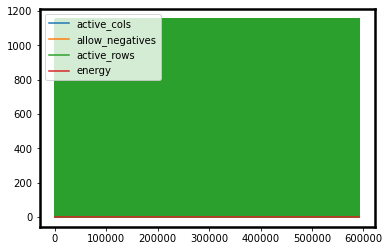

In [17]:
energy_table.plot()

<AxesSubplot:xlabel='model_name,active_cols,active_rows,allow_negatives'>

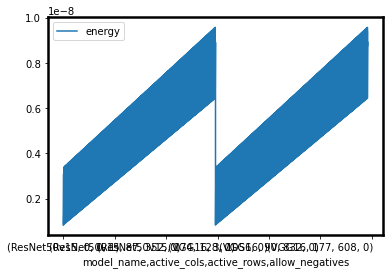

In [23]:
energy_table.groupby(by=['model_name','active_cols','active_rows','allow_negatives']).mean().plot()

In [30]:
et_out = energy_table[energy_table['model_name'].eq('VGG16')]
et_out = et_out[['active_cols','active_rows','allow_negatives','energy']]
et_out['area'] = 0.001525879
et_out['cellwidth'] = 2
et_out['technology'] = 'sonos'

In [32]:
et_out.to_csv("sonos_compute.csv", index=False)

In [10]:
tx[1]['tileMVM_energies']['-257'].shape

(1152,)

In [11]:
formed_data = {'active_cols':[],'allow_negatives':[], 'active_rows':[], 'energy':[]}

In [10]:
x = [[1,2,3],[4,5,6]]

In [14]:
inputs = [1,2,3,4]
def test_map(inputx):
    return [inputx, inputx * 2]

with Pool(2) as pool:
    pm = pool.map(test_map, inputs, 1)

In [16]:
[m[0] for m in pm]

[1, 2, 3, 4]

In [18]:
formed_data = generate_energy_table(tx[1])

In [22]:
pd.DataFrame(formed_data)

,active_cols,allow_negatives,active_rows,energy
0,257,0,0,6.434902e-09
1,257,0,1,6.437048e-09
2,257,0,2,6.439193e-09
3,257,0,3,6.441338e-09
4,257,0,4,6.443483e-09
...,...,...,...,...
592123,256,1,1147,9.558120e-09
592124,256,1,1148,9.560470e-09
592125,256,1,1149,9.562819e-09
592126,256,1,1150,9.565168e-09


In [10]:
d = pd.DataFrame(tx[0])
d['layer_sizes'] = tx[2]
d

,type,name,NcolsMVM,weightReorder,NrowsMVM,NXbars,Gr,Gc,MVMsPerXbar,Nduplicates,...,S,Nix,Niy,GcTile,InputSplit,OutputSplit,Ninputs_tile,Noutputs_tile,Nbits,layer_sizes
0,conv,Conv1,64.0,False,54.0,0.5,1.0,0.25,4.0,448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000065
1,conv,Conv2,64.0,True,256.0,0.5,1.0,0.25,4.0,448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000065
2,maxpool,MP1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,2.0,224.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,conv,Conv3,128.0,False,576.0,1.0,1.0,0.50,2.0,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000032
4,conv,Conv4,128.0,False,1152.0,2.0,1.0,1.00,1.0,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000065
5,maxpool,MP2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,2.0,112.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,conv,Conv5,256.0,False,1152.0,2.0,1.0,1.00,1.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000016
7,conv,Conv6,256.0,False,2304.0,4.0,2.0,1.00,1.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000032
8,conv,Conv7,256.0,False,2304.0,4.0,2.0,1.00,1.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000032
9,maxpool,MP3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,2.0,56.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000037


In [8]:
len(tx[2])

24

In [26]:
x = {'asdf':1}

In [ ]:
x.